# 🎵 스포티파이 트랙 분석
## 데이터셋 출처
**🎹 Spotify Tracks Dataset**
- kaggle: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/data

## 데이터 설명
- 125개의 장르를 포함한 스포티파이 트랙 데이터셋
- 컬럼은 1) '각 트랙에게 주어지는 unique한 id', '아티스트 이름', '앨범 이름', '트랙 이름' 등의 트랙 식별을 위한 변수들과 2) 'loudness', 'energy', 'liveness'와 같이 각 트랙의 audio feature 정보를 가진 변수들, 3) 트랙의 인기도를 나타내는 변수, 4) 트랙의 장르 등으로 구성됨
- `csv` format : tabular data

### Column Description
1. track_id: The Spotify ID for the track
2. artists: The artists' names who performed the track. If there is more than one artist, they are separated by a ;
3. album_name: The album name in which the track appears
4. track_name: Name of the track
5. popularity: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
6. duration_ms: The track length in milliseconds
7. explicit: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
8. danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
9. energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
10. key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
11. loudness: The overall loudness of a track in decibels (dB)
12. mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
13. speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
14. acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
15. instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
16. liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
17. valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
18. tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
19. time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
20. track_genre: The genre in which the track belongs

# 라이브러리 및 데이터 불러오기

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [11]:
df = pd.read_csv('dataset.csv', index_col=0)

# EDA

In [12]:
df.shape

(114000, 20)

-> 20개의 컬럼, 114,000개의 로우

In [13]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

In [15]:
# 결측치 개수 확인
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

artists, album_name, track_name 에서 결측치 1개씩 존재함
-> 하나의 로우에 있는 건가?

In [16]:
# 중복되는 값이 있나?

df.duplicated().sum()

np.int64(450)

In [17]:
df = df.drop_duplicates()
df.shape

(113550, 20)

In [18]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113550.000000,1.135500e+05,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000
mean,33.324139,2.280794e+05,0.567031,0.642090,5.309467,-8.243419,0.637860,0.084674,0.314067,0.155702,0.213611,0.474207,122.175888,3.904218
std,22.283976,1.064148e+05,0.173408,0.251052,3.560134,5.011401,0.480621,0.105761,0.331907,0.309216,0.190461,0.259204,29.972861,0.432115
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.741802e+05,0.456000,0.473000,2.000000,-9.997750,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296500,4.000000
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000
75%,50.000000,2.615878e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048675,0.273000,0.683000,140.073750,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [19]:
df.value_counts()

track_id                artists                   album_name                   track_name                                          popularity  duration_ms  explicit  danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence  tempo    time_signature  track_genre   
7zz7iNGIWhmfFE7zlXkMma  The Posies                Amazing Disgrace             Grant Hart                                          22          144973       False     0.263         0.957   4    -6.887    1     0.0897       0.000023      0.006300          0.3780    0.204    172.932  4               power-pop         1
0000vdREvCVMxbQTkS888c  Rill                      Lolly                        Lolly                                               44          160725       True      0.910         0.374   8    -9.844    0     0.1990       0.075700      0.003010          0.1540    0.432    104.042  4               german            1
000CC8EParg64OmTxVnZ0p  Glee Cast                 G

In [20]:
df.tail()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,5,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,0,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,0,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,7,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,world-music
113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,1,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,world-music


## 🔢 Numerical Columns

In [21]:
# 수치형 컬럼과 범주형 컬럼으로 나누어서 살펴보자

numerical_cols = df[df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]]
numerical_cols.shape

(113550, 14)

In [22]:
numerical_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113550 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        113550 non-null  int64  
 1   duration_ms       113550 non-null  int64  
 2   danceability      113550 non-null  float64
 3   energy            113550 non-null  float64
 4   key               113550 non-null  int64  
 5   loudness          113550 non-null  float64
 6   mode              113550 non-null  int64  
 7   speechiness       113550 non-null  float64
 8   acousticness      113550 non-null  float64
 9   instrumentalness  113550 non-null  float64
 10  liveness          113550 non-null  float64
 11  valence           113550 non-null  float64
 12  tempo             113550 non-null  float64
 13  time_signature    113550 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 13.0 MB


In [23]:
numerical_cols.sample(10)

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
23727,48,195714,0.762,0.808,0,-3.338,1,0.1020,0.048200,0.000028,0.1370,0.248,126.037,4
35708,39,176537,0.506,0.897,2,-3.523,1,0.0430,0.477000,0.000000,0.3600,0.891,168.112,4
111821,18,160946,0.672,0.731,7,-7.640,0,0.0439,0.261000,0.776000,0.1970,0.129,84.512,4
44360,52,205240,0.618,0.317,0,-9.835,1,0.0278,0.561000,0.000000,0.1020,0.372,124.826,4
2249,1,318586,0.351,0.827,6,-5.351,1,0.0412,0.000222,0.000118,0.0755,0.145,105.463,4
70455,54,274920,0.810,0.543,0,-12.257,1,0.0300,0.790000,0.000057,0.1450,0.823,114.934,4
36553,41,246000,0.448,0.958,11,-3.343,1,0.0822,0.009510,0.051700,0.1730,0.139,119.999,3
13314,10,256534,0.911,0.820,7,-4.158,1,0.2860,0.000972,0.000000,0.1180,0.710,121.795,4
36194,38,173893,0.735,0.887,4,-4.517,0,0.1180,0.219000,0.000548,0.1770,0.516,95.995,4
63976,32,237680,0.359,0.882,2,-3.810,1,0.0627,0.007000,0.000002,0.2870,0.521,143.819,4


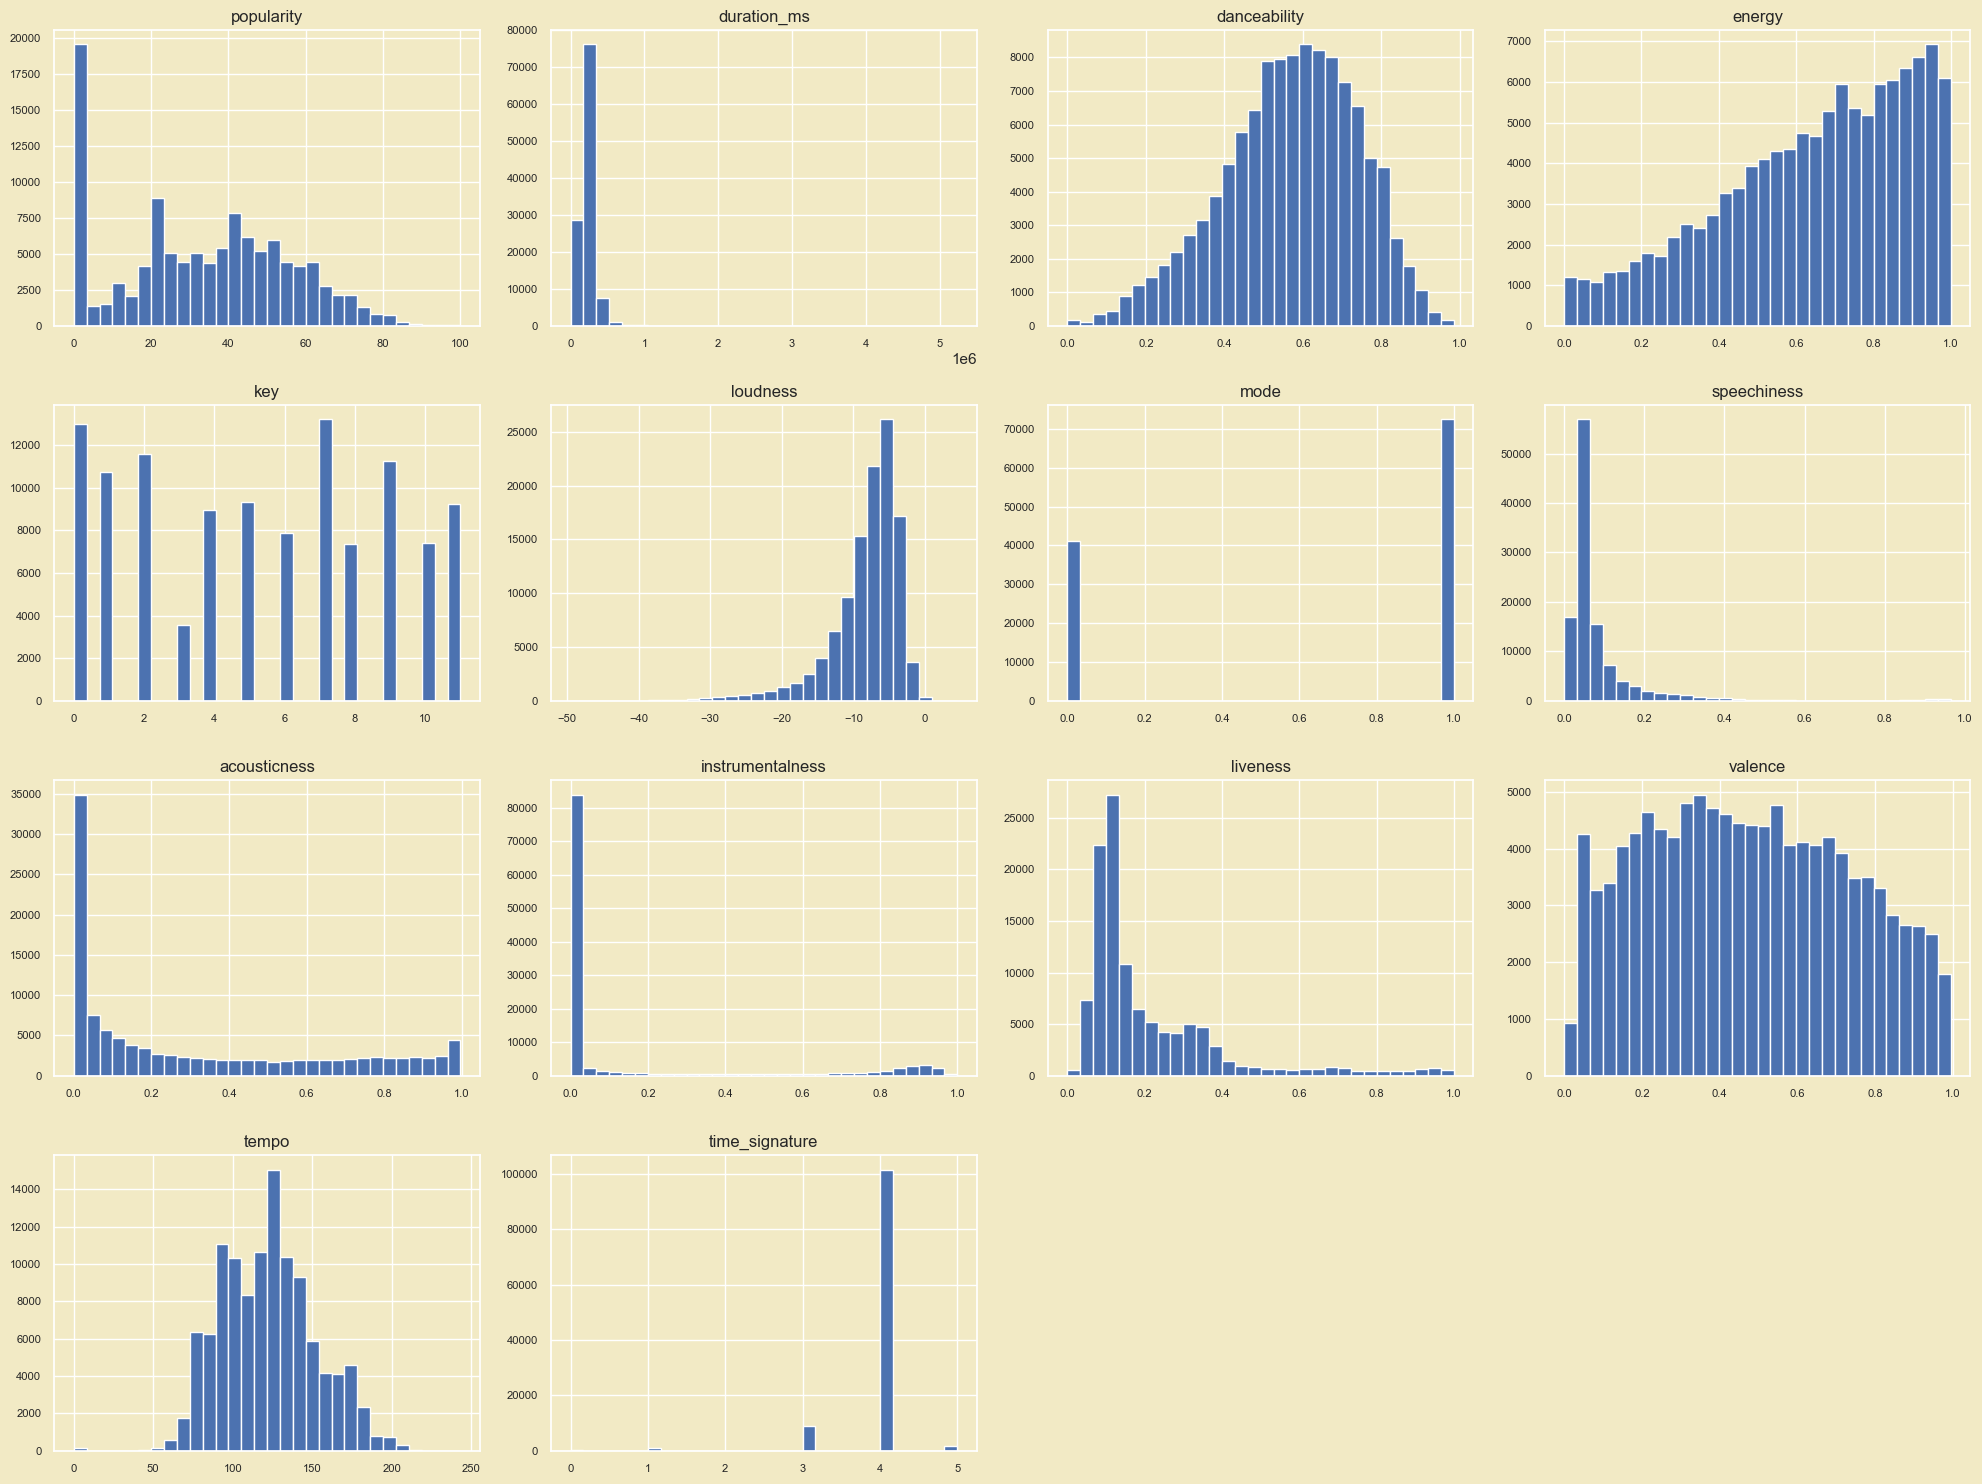

In [26]:
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
numerical_cols.hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

- `popularity` : 0부터 100 사이의 정수 값, 0을 가진 값이 많아 보임
- `dancability`, `tempo`, `valence` : 다른 변수들에 비해 상대적으로 normal에 가까운 데이터 분포를 보임
- `time_signature`: 5의 값을 가지는 로우가 많음
- `loudness` : 왼쪽 꼬리가 긴 분포
- `speechiness`, `acusticness`, `instrumentainess`, `liveness` : 오른쪽 꼬리가 긴 분포
- `energy` : 0부터 1까지의 값들로 분포해 있는데, 점점 증가하는 형태

## 🔠 Categorical Columns

In [27]:
categorical_cols = df[df.columns[(df.dtypes == 'object') | (df.dtypes == 'bool')]]
categorical_cols.shape

(113550, 6)

In [28]:
categorical_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113550 entries, 0 to 113999
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   track_id     113550 non-null  object
 1   artists      113549 non-null  object
 2   album_name   113549 non-null  object
 3   track_name   113549 non-null  object
 4   explicit     113550 non-null  bool  
 5   track_genre  113550 non-null  object
dtypes: bool(1), object(5)
memory usage: 5.3+ MB


In [29]:
# 결측치 로우 확인
categorical_cols[categorical_cols.isnull().any(axis=1)]

,track_id,artists,album_name,track_name,explicit,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,False,k-pop


In [30]:
index_to_drop = df[categorical_cols.isnull().any(axis=1)].index
df.drop(index_to_drop, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113549 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113549 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113549 non-null  int64  
 5   duration_ms       113549 non-null  int64  
 6   explicit          113549 non-null  bool   
 7   danceability      113549 non-null  float64
 8   energy            113549 non-null  float64
 9   key               113549 non-null  int64  
 10  loudness          113549 non-null  float64
 11  mode              113549 non-null  int64  
 12  speechiness       113549 non-null  float64
 13  acousticness      113549 non-null  float64
 14  instrumentalness  113549 non-null  float64
 15  liveness          113549 non-null  float64
 16  valence           113549 

In [32]:
df.describe(include=['object', 'bool'])

,track_id,artists,album_name,track_name,explicit,track_genre
count,113549,113549,113549,113549,113549,113549
unique,89740,31437,46589,73608,2,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,False,acoustic
freq,9,279,195,151,103831,1000


- `The Beatles`: 상대적으로 빈도가 높은 아티스트
- `Alternative Christmas 2022`: top album
- `Run Rudolph Run`: top track
- `acoustic`: 가장 많이 재생된 트랙 장르

- 🧐 `Explicit` : '욕설이나 성적으로 노골적이고 직설적인 가사'를 포함하는지 여부

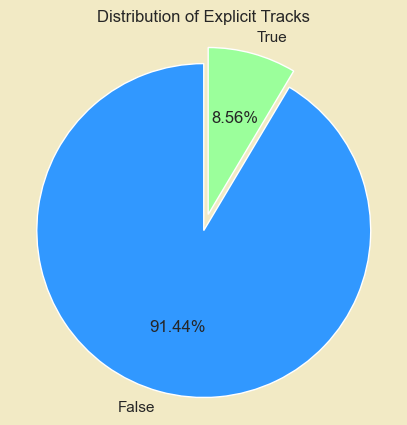

In [ ]:
unique_values, value_counts = np.unique(categorical_cols['explicit'], return_counts=True)

fig, ax = plt.subplots(figsize=(5, 5))

explode = [0, 0.1]
colors = ["#3198ff","#9bff9b"]

ax.pie(value_counts, labels=unique_values, autopct='%1.2f%%', startangle=90, colors=colors, explode=explode)

ax.axis('equal')
ax.set_title('Distribution of Explicit Tracks')
plt.show()

- 대부분의 트랙(약 91.44%)은 explicit lyrics를 포함하지 않음

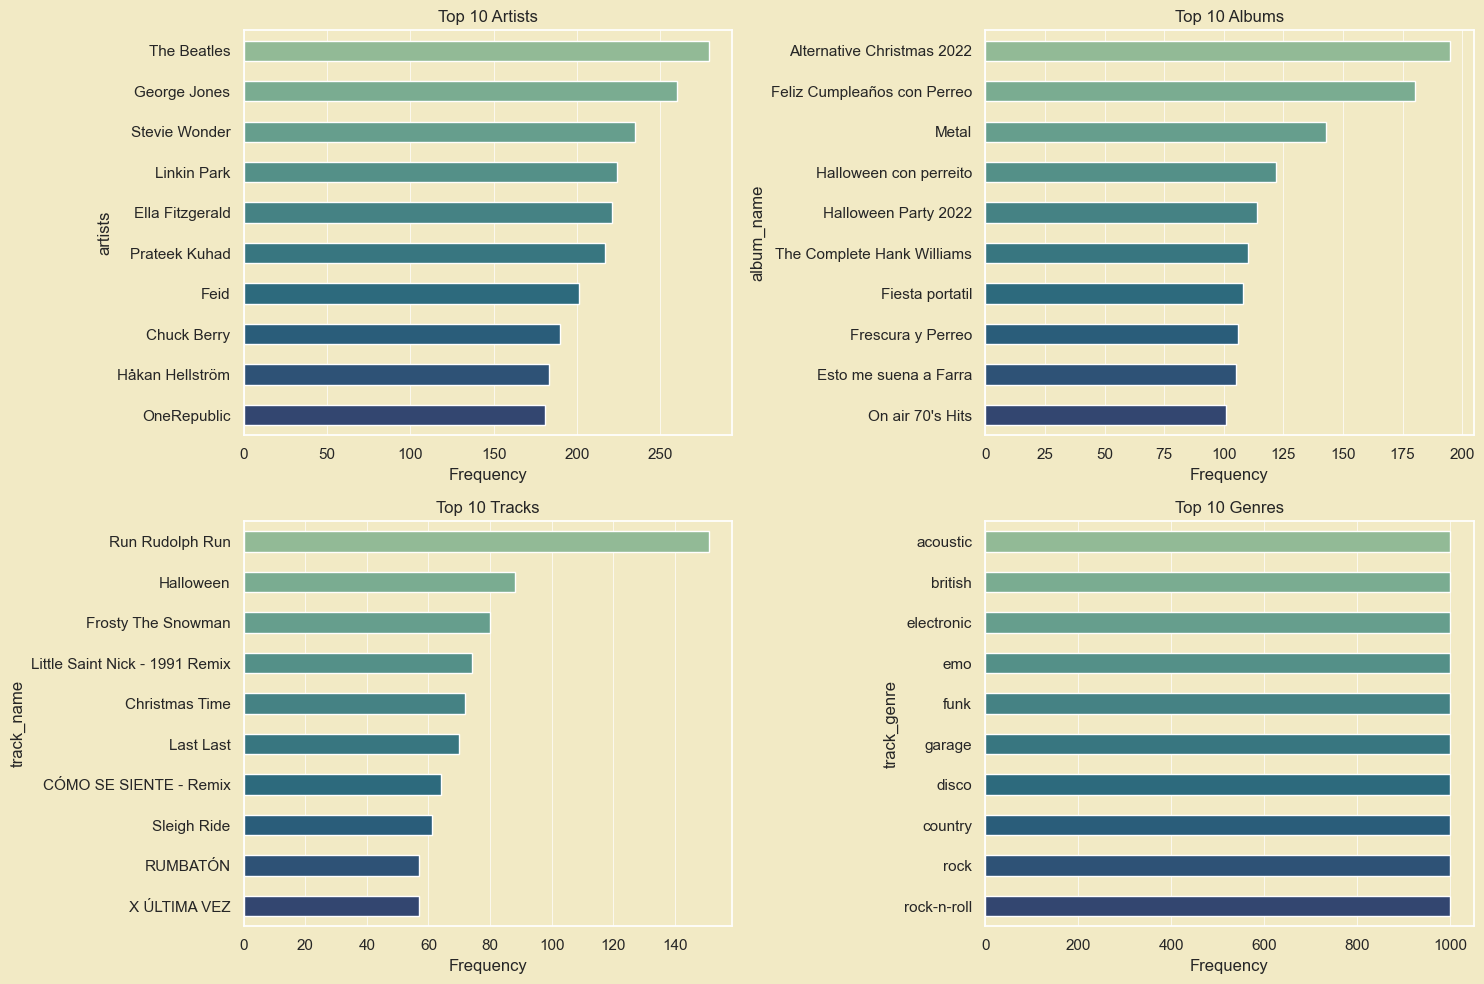

In [ ]:
top_n = 10
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})

# Get the top N most frequent artists, albums, tracks, and genres
top_artists = df['artists'].value_counts().head(top_n)
top_albums = df['album_name'].value_counts().head(top_n)
top_tracks = df['track_name'].value_counts().head(top_n)
top_genres = df['track_genre'].value_counts().head(top_n)

# Disable FutureWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    # Plotting
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    # Top N Artists
    sns.barplot(x=top_artists.values, y=top_artists.index, palette="crest", ax=axes[0, 0], orient='h',  zorder=3, width=0.5)
    axes[0, 0].set_title(f'Top {top_n} Artists')
    axes[0, 0].set_xlabel('Frequency')
    axes[0, 0].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Albums
    sns.barplot(x=top_albums.values, y=top_albums.index, palette="crest", ax=axes[0, 1], orient='h', zorder=3, width=0.5)
    axes[0, 1].set_title(f'Top {top_n} Albums')
    axes[0, 1].set_xlabel('Frequency')
    axes[0, 1].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Tracks
    sns.barplot(x=top_tracks.values, y=top_tracks.index, palette="crest", ax=axes[1, 0], orient='h', zorder=3, width=0.5)
    axes[1, 0].set_title(f'Top {top_n} Tracks')
    axes[1, 0].set_xlabel('Frequency')
    axes[1, 0].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Genres
    sns.barplot(x=top_genres.values, y=top_genres.index, palette="crest", ax=axes[1, 1], orient='h', zorder=3, width=0.5)
    axes[1, 1].set_title(f'Top {top_n} Genres')
    axes[1, 1].set_xlabel('Frequency')
    axes[1, 1].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    plt.tight_layout()
    plt.show()

## 이상치 확인하기

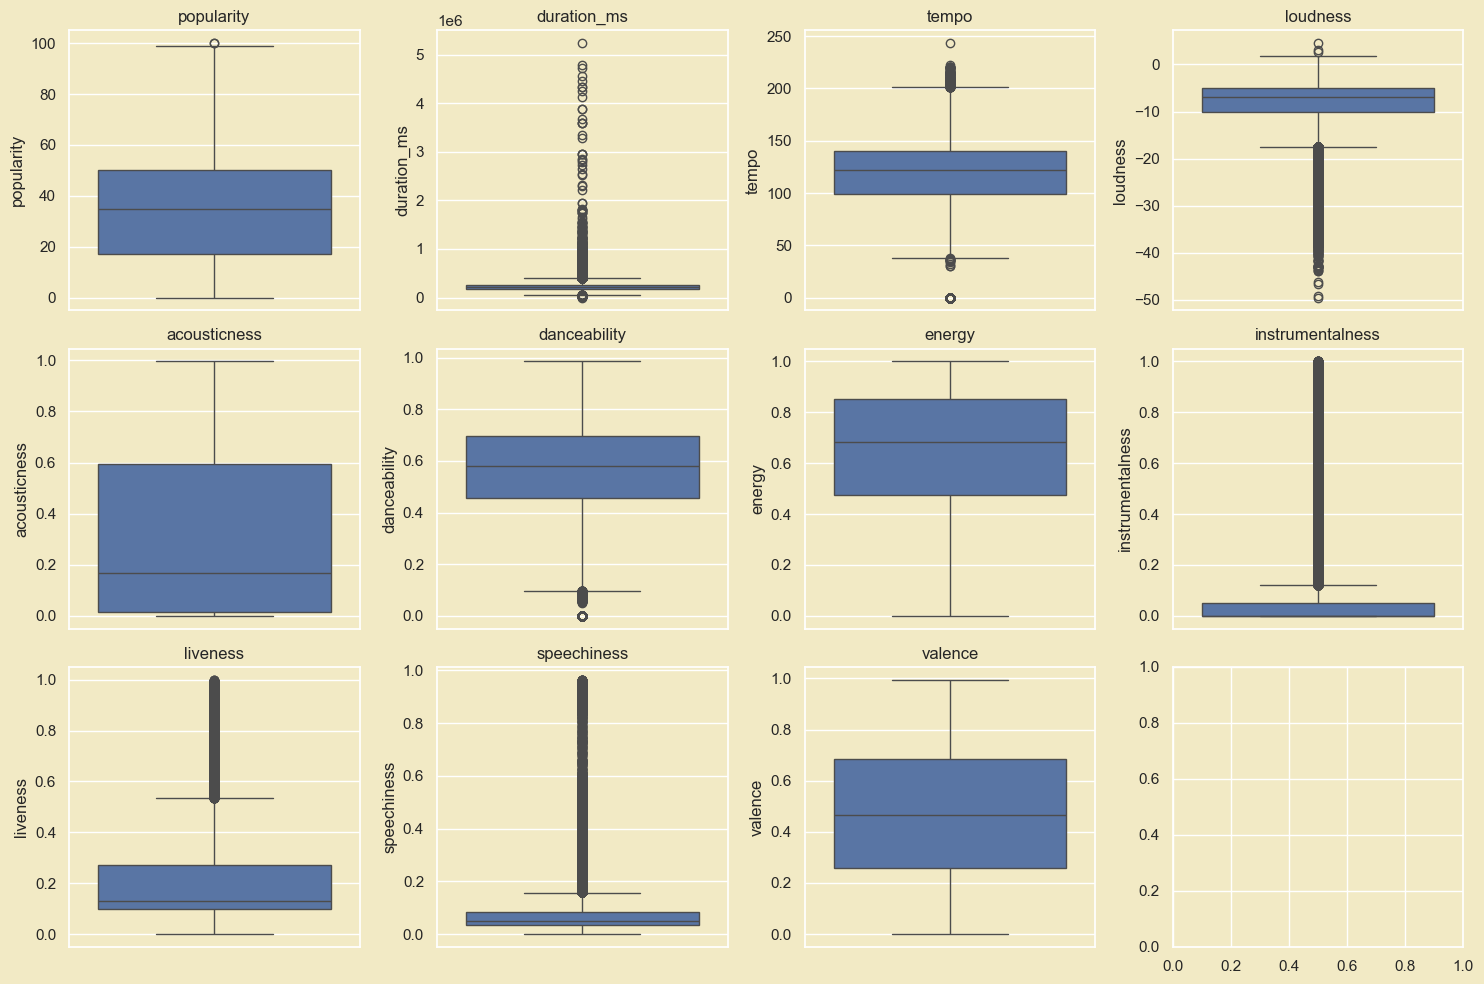

In [40]:
# boxplot for numerical columns
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
columns = ['popularity', 'duration_ms', 'tempo', 'loudness', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for i, col in enumerate(columns):
    sns.boxplot(y=col, data=numerical_cols, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(col)
plt.tight_layout()
plt.show()

- `acousticness`, `energy`, `valence`: 이상치 없음
- `duration_ms`, `instrumentalness`, `loudness`, `liveness`, `speechiness`: 앞서 확인한 수치형 컬럼들에 대한 데이터 분포와 유사하게 한쪽으로 데이터 분포가 치우쳐져 있음. quantile 밖에 있는 값들을 모두 이상치로 처리하고 제거해서는 안 됨.
- `popularity`: 이상치로 보이는 값이 하나 있지만 유의하지 않아 보임.
- popularity를 제외한 모든 수치형 컬럼들은 노래에 영향을 주는 요소들이므로 다양성, 복잡성을 가질 수밖에 없음 -> 이상치 처리 X

## Correlation Analysis

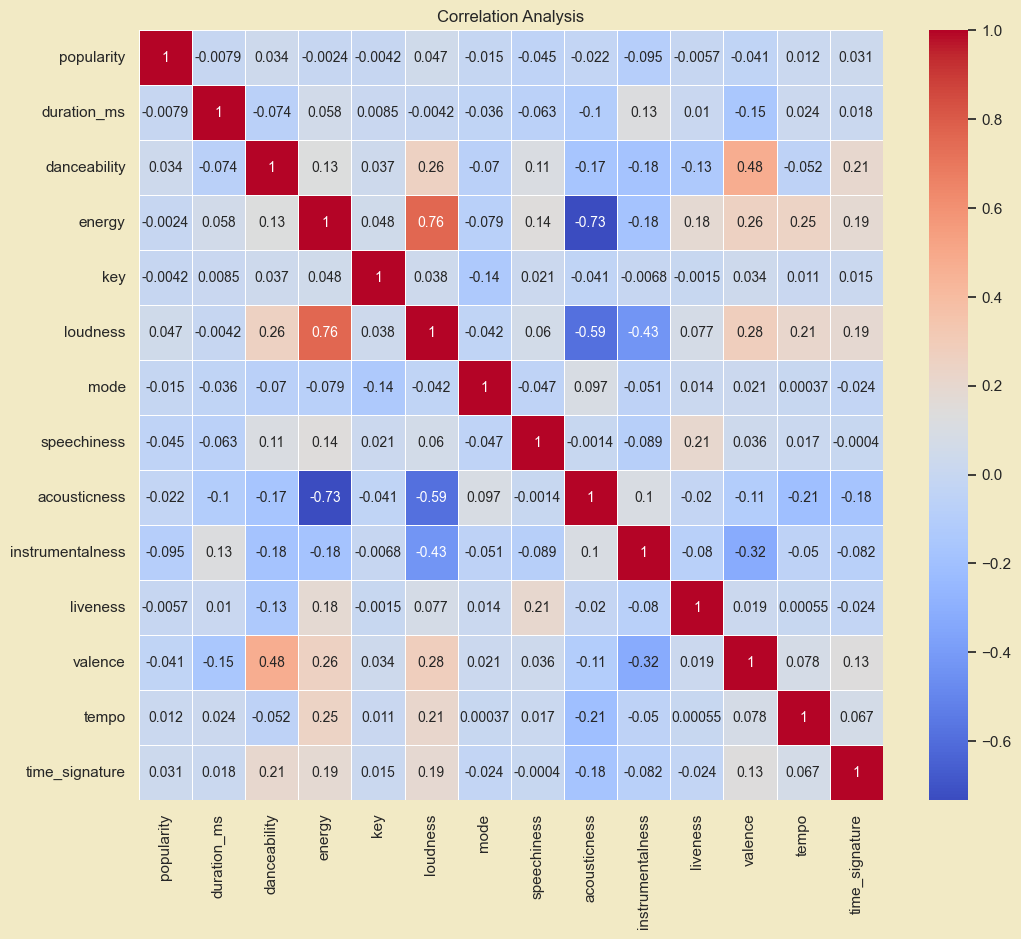

In [ ]:
# 수치형 컬럼만 포함하여 히트맵 그려 보기
corr_mat = df.select_dtypes(include=["int", "float"]).corr()

plt.figure(figsize=(12, 10), facecolor='#F2EAC5', edgecolor='black')
ax = plt.axes()
ax.set_facecolor('#F2EAC5')
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Analysis')
plt.show()

- `loudness와 energy`: 0.76의 양의 상관관계
- `acousticness와 energy`: -.73의 음의 상관관계
- `loudness와 acousticness`: -.59의 음의 상관관계
- `tempo`: 다른 변수들과 선형적인 관계가 없어 보임
- `loudness, energy, acousticness`: 모두 오디오 크기나 에너제틱한 정도를 나타내는 변수들, 즉 비슷한 특징을 나타내는 변수여서 상관관계가 높게 나온 것이 아닐까? 

## 앞으로의 분석 방향 🧐
1. 회귀(Regression): 다양한 audio features를 활용한 곡 순위 `popularity` 예측
2. 분류(Classification): 트랙의 장르 분류
3. 군집화(Clustering): 다양한 audio features를 기반으로 비슷한 분위기의 곡들을 그룹으로 묶는 군집 예측
- Build-Up 세션에서 다루지 않는 비지도학습 알고리즘을 활용해 볼까 싶음